# 類別

In [1]:
# 預處理
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf

dataset = pd.read_csv('Part1Data.csv')

In [2]:
# 設定答案
dataset_target = dataset.pop('IsoverAVE')
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset)
dataset_2 = pd.DataFrame(dataset_1,columns=dataset.columns)
dataset_2


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone2PowerConsumption,Zone3PowerConsumption
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,0.322796,0.300199
...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.450675,0.634246,0.212301
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.431618,0.608847,0.203864
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.409703,0.579491,0.188927
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.393187,0.559197,0.181874


In [4]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset_2 , dataset_target , test_size = 0.2)

In [5]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(13, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(13, activation='relu'))

#輸出層，Sigmoid
network.add(layers.Dense(1, activation='sigmoid'))
network.add(Flatten())
network.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['acc',precision,recall] )
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                117       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=250,)

Epoch 1/50
168/168 [==============================] - 0s 760us/step - loss: 0.6919 - acc: 0.5052 - precision: 0.5024 - recall: 0.8295
Epoch 2/50
168/168 [==============================] - 0s 780us/step - loss: 0.6742 - acc: 0.5726 - precision: 0.5534 - recall: 0.7272
Epoch 3/50
168/168 [==============================] - 0s 1ms/step - loss: 0.6598 - acc: 0.6747 - precision: 0.6450 - recall: 0.7677
Epoch 4/50
168/168 [==============================] - 0s 1ms/step - loss: 0.6388 - acc: 0.7461 - precision: 0.7047 - recall: 0.8398: 0s - loss: 0.6432 - acc: 0.7377 - precision: 0.6991 - recall: 0.
Epoch 5/50
168/168 [==============================] - 0s 1ms/step - loss: 0.6036 - acc: 0.8046 - precision: 0.7488 - recall: 0.9112
Epoch 6/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5437 - acc: 0.8596 - precision: 0.8045 - recall: 0.9474
Epoch 7/50
168/168 [==============================] - 0s 965us/step - loss: 0.4705 - acc: 0.8912 - precision: 0.8426 - recall: 0.9600
Epoc

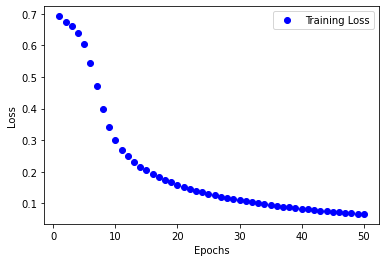

In [7]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
preds = network.evaluate(x = X_test, y = Y_test)

F1 = 2 * (preds[2] * preds[3]) / (preds[2] + preds[3])
print('Precision', preds[2])
print('Recall', preds[3])
print('F1',F1)

328/328 [==============================] - 0s 513us/step - loss: 0.0623 - acc: 0.9870 - precision: 0.9870 - recall: 0.9876
Precision 0.9869580864906311
Recall 0.9875873327255249
F1 0.9872726093442856


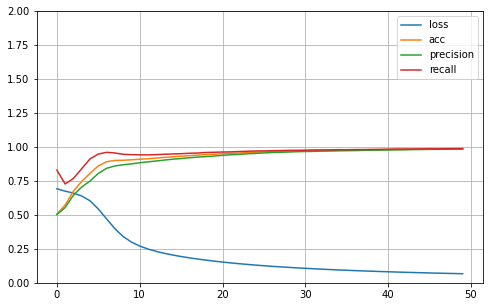

In [9]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

# 數值

In [10]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error#MAPE
import tensorflow as tf
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [11]:
#匯入資料
dataset = pd.read_csv('Part1Data.csv')

In [12]:
#丟棄不需用到的資料
dataset = dataset.drop("IsoverAVE",axis = 1)
dataset = dataset.drop("Zone2PowerConsumption",axis = 1)
dataset = dataset.drop("Zone3PowerConsumption",axis = 1)

In [13]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset)
dataset_2 = pd.DataFrame(dataset_1,columns=dataset.columns)
dataset_2

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834
...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.450675
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.431618
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.409703
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.393187


In [14]:
# 設定答案
dataset_target = dataset_2.pop('Zone 1 Power Consumption')
AVRvalue = pd.DataFrame(dataset_target).mean()
dataset_target.loc()[dataset_target == 0]= AVRvalue[0]
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset_2 , dataset_target , test_size = 0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41932, 5)
(10484, 5)
(10484,)


In [16]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(13, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(13, activation='relu'))
#輸出層，Sigmoid
network.add(layers.Dense(1, activation='sigmoid'))
network.add(Flatten())
network.compile(optimizer='sgd', loss='MAE',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                78        
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 14        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
Total params: 274
Trainable params: 274
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=100)

Epoch 1/50
420/420 [==============================] - 0s 548us/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 47.6543 - mean_squared_error: 0.0357
Epoch 2/50
420/420 [==============================] - 0s 505us/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 43.2742 - mean_squared_error: 0.0330
Epoch 3/50
420/420 [==============================] - 0s 525us/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 42.1434 - mean_squared_error: 0.0324
Epoch 4/50
420/420 [==============================] - 0s 532us/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 41.0539 - mean_squared_error: 0.0320
Epoch 5/50
420/420 [==============================] - 0s 537us/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 39.9896 - mean_squared_error: 0.0316
Epoch 6/50
420/420 [==============================] - 0s 512us/step - loss: 0.14

420/420 [==============================] - 0s 1ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 31.4143 - mean_squared_error: 0.0286
Epoch 43/50
420/420 [==============================] - 0s 991us/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 31.4475 - mean_squared_error: 0.0286
Epoch 44/50
420/420 [==============================] - 0s 825us/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 31.3881 - mean_squared_error: 0.0286
Epoch 45/50
420/420 [==============================] - 0s 837us/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 31.4124 - mean_squared_error: 0.0285
Epoch 46/50
420/420 [==============================] - 0s 634us/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 31.3544 - mean_squared_error: 0.0285
Epoch 47/50
420/420 [==============================] - 0s 628us/step - loss: 0.1277 - mea

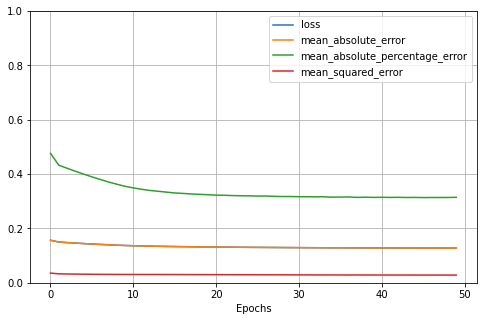

In [18]:
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.show()